In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [11]:
# Load data
df = pd.read_csv(r"C:\Users\Ritik\Desktop\credit score\data\processed\features_per_wallet.csv")

In [12]:
df.head()

,wallet,num_borrow,num_deposit,num_redeemunderlying,num_repay,total_borrow,total_deposit,total_redeemunderlying,total_repay,avg_tx_gap_sec,repay_borrow_ratio,total_transactions,activity_score,net_borrow,borrow_to_deposit_ratio,deposit_frequency,repay_frequency,repayment_efficiency,avg_repay_per_tx
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,0,1,0,0,0.000000e+00,1.987664e+03,0.000000e+00,0.000000,0.000000,0.000000e+00,1,1.000000,0.000000e+00,0.000000,1.000000,0.00,0.000000e+00,0.000000
1,0x000000000051d07a4fb3bd10121a343d85818da6,0,1,0,0,0.000000e+00,2.856945e+14,0.000000e+00,0.000000,0.000000,0.000000e+00,1,1.000000,0.000000e+00,0.000000,1.000000,0.00,0.000000e+00,0.000000
2,0x000000000096026fb41fc39f9875d164bd82e2dc,0,2,0,0,0.000000e+00,5.152311e+09,0.000000e+00,0.000000,654405.000000,0.000000e+00,2,0.000003,0.000000e+00,0.000000,0.000003,0.00,0.000000e+00,0.000000
3,0x0000000000e189dd664b9ab08a33c4839953852c,0,0,17,0,0.000000e+00,0.000000e+00,9.803600e+14,0.000000,698369.937500,0.000000e+00,17,0.000024,0.000000e+00,0.000000,0.000000,0.00,0.000000e+00,0.000000
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,15,250,130,4,6.029762e+16,2.065773e+17,1.128745e+17,70150.263791,28843.251256,1.163400e-12,399,0.013833,6.029762e+16,0.291889,0.008667,0.01,1.163400e-12,14030.052758


In [13]:
df.shape

(3497, 19)

In [14]:
df.describe()

,num_borrow,num_deposit,num_redeemunderlying,num_repay,total_borrow,total_deposit,total_redeemunderlying,total_repay,avg_tx_gap_sec,repay_borrow_ratio,total_transactions,activity_score,net_borrow,borrow_to_deposit_ratio,deposit_frequency,repay_frequency,repayment_efficiency,avg_repay_per_tx
count,3497.000000,3497.000000,3497.000000,3497.000000,3.497000e+03,3.497000e+03,3.497000e+03,3.497000e+03,3.497000e+03,3497.000000,3497.000000,3.497000e+03,3.497000e+03,3.497000e+03,3497.000000,3497.000000,3.497000e+03,3.497000e+03
mean,4.885902,10.811553,9.237918,3.589648,7.110951e+16,1.205038e+17,9.254020e+16,4.959363e+16,2.085435e+05,0.260908,28.595939,3.606282e-01,2.151588e+16,9.115566e+14,0.301866,0.058487,2.228613e+12,4.088752e+15
std,15.133573,29.868997,242.518307,13.374770,1.144582e+18,1.706699e+18,1.452380e+18,9.391498e+17,5.136681e+05,0.445038,250.732075,7.968987e-01,4.995636e+17,4.938669e+16,0.458377,0.098724,1.317760e+14,7.711572e+16
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,2.415588e-07,-3.003055e+18,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,1.000000,0.000000,0.000000,0.000000e+00,2.001414e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,5.718958e-05,0.000000e+00,0.000000e+00,0.000016,0.000000,0.000000e+00,0.000000e+00
50%,0.000000,2.000000,0.000000,0.000000,0.000000e+00,1.964827e+12,0.000000e+00,0.000000e+00,2.344196e+04,0.000000,3.000000,2.665553e-03,0.000000e+00,0.000000e+00,0.000719,0.000000,0.000000e+00,0.000000e+00
75%,3.000000,6.000000,3.000000,2.000000,2.503978e+12,1.910777e+15,4.170807e+14,2.225249e+03,2.006774e+05,0.499569,16.000000,1.000000e+00,4.942371e+03,1.501199e-01,1.000000,0.110345,4.789860e-01,4.882157e+02
max,200.000000,511.000000,14265.000000,291.000000,3.505958e+19,6.056302e+19,6.058051e+19,3.502175e+19,8.279556e+06,3.409999,14265.000000,3.565773e+01,2.610001e+19,2.914553e+18,3.272727,0.722222,7.792635e+15,2.452480e+18


In [15]:
df.shape

(3497, 19)

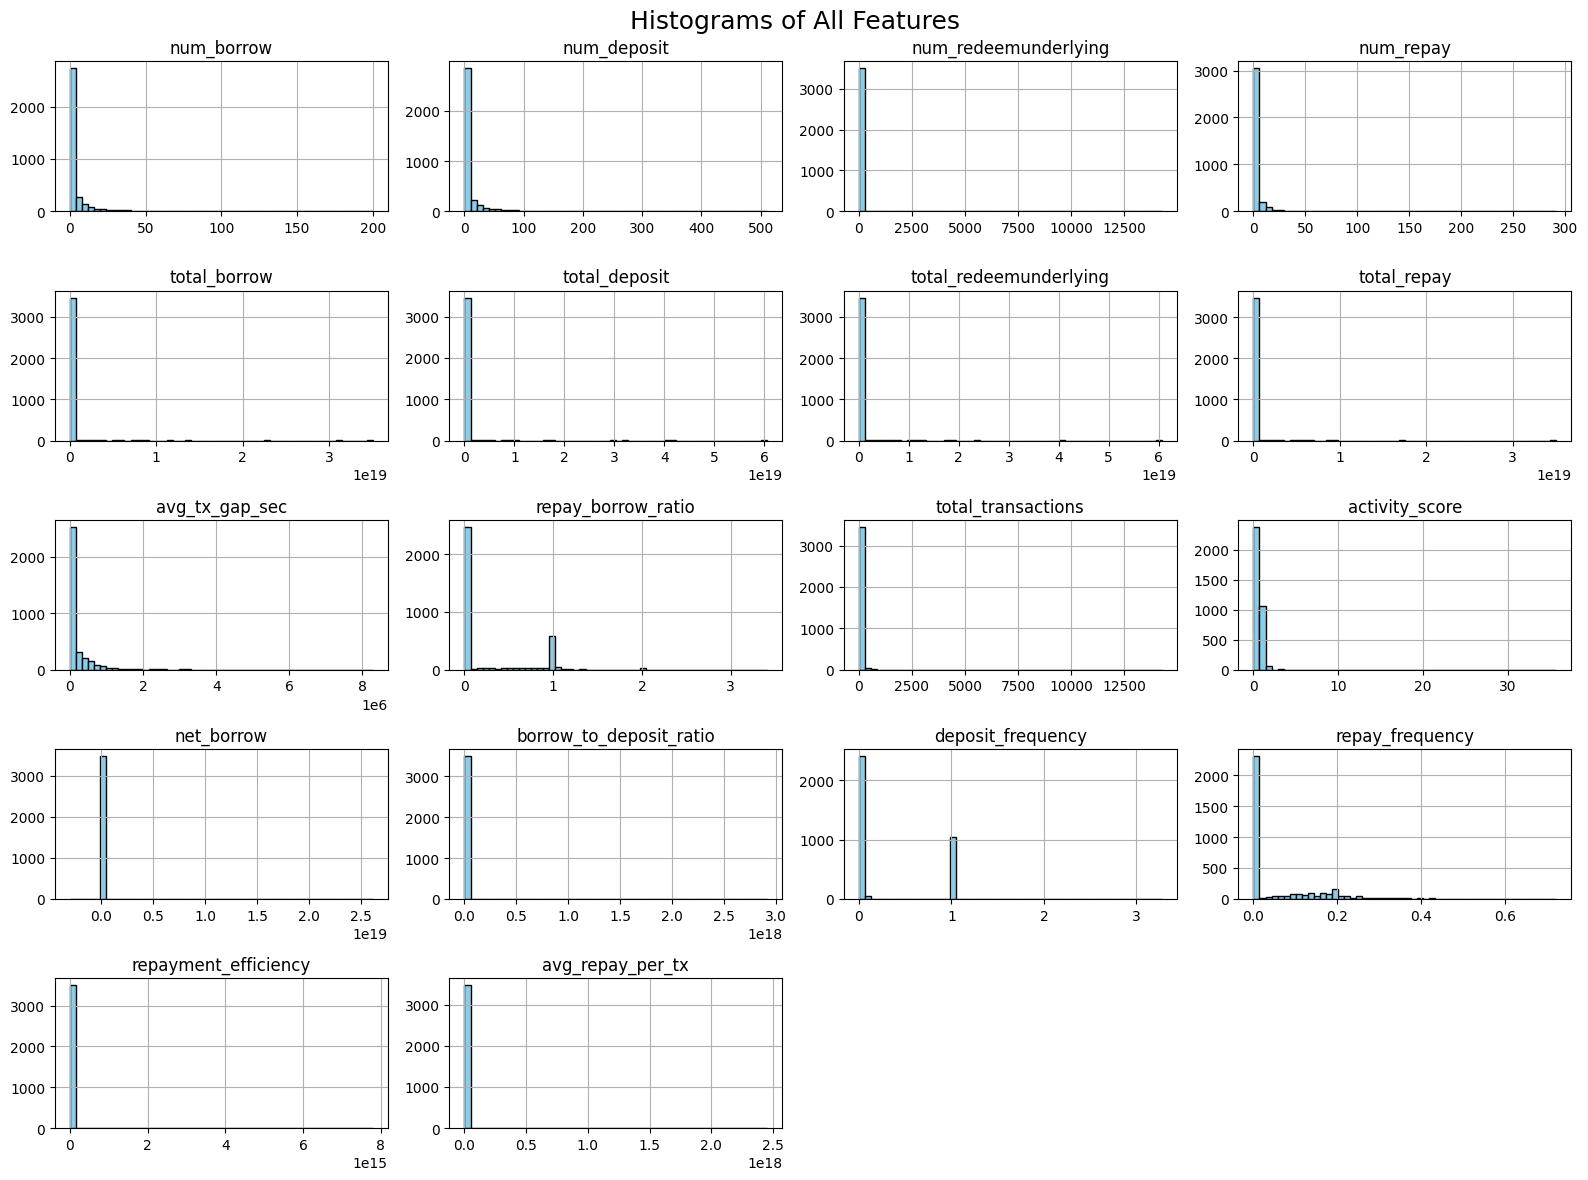

In [16]:
# Basic EDA - Histograms
df.hist(figsize=(16, 12), bins=50, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of All Features", fontsize=18)
plt.tight_layout()
plt.show()

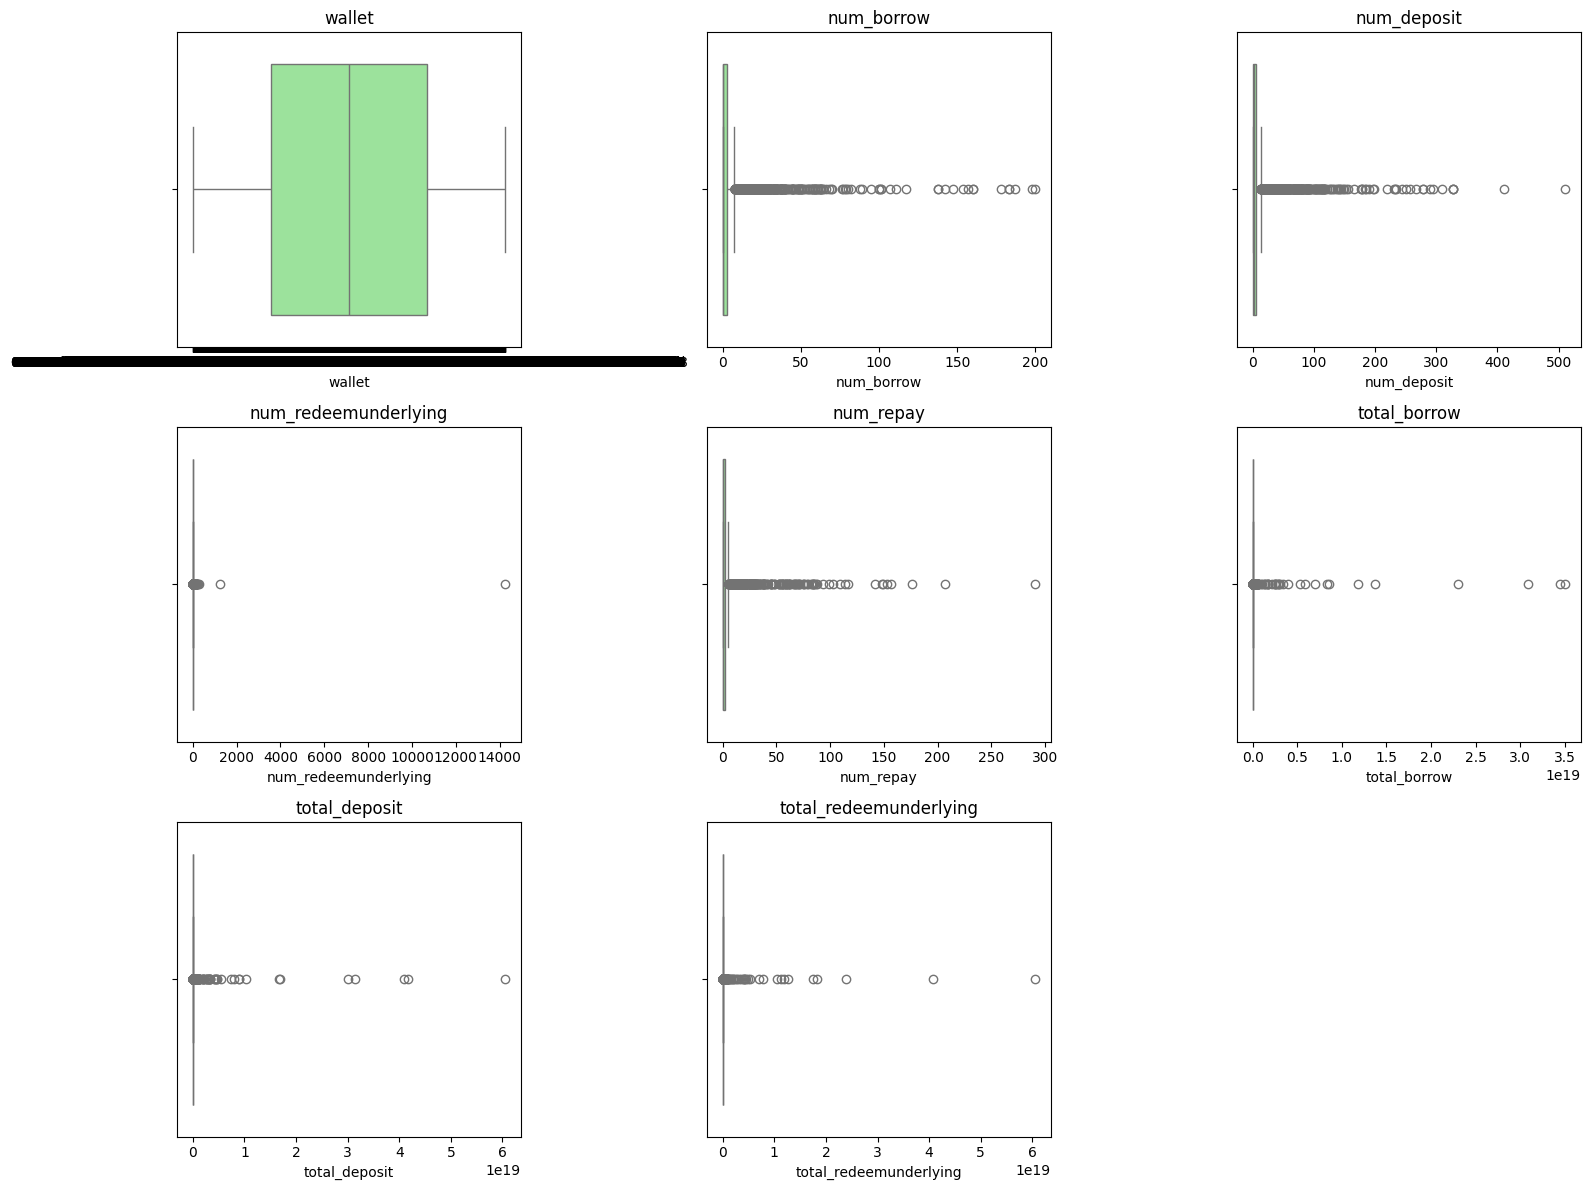

In [17]:
# Boxplots to visualize outliers
plt.figure(figsize=(16, 12))
for i, col in enumerate(df.columns[:8]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()

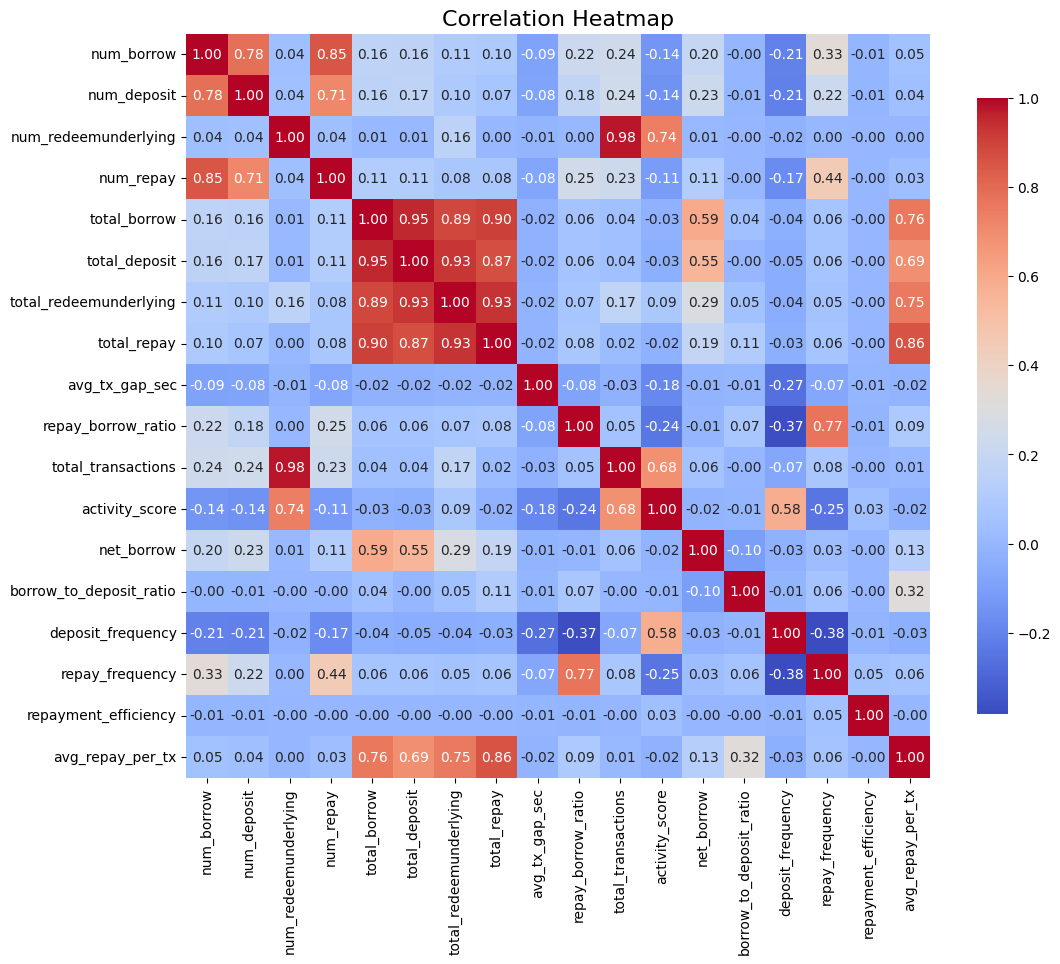

In [24]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap", fontsize=16)
plt.show()